In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import imodelsx.process_results
import sys
from sklearn.metrics import accuracy_score

def load_csvs(path):

    X_train = pd.read_csv(f'{path}/X_trainval.csv', index_col=0)
    X_train_hat = pd.read_csv(f'{path}/X_trainval_hat.csv', index_col=0)
    X_test = pd.read_csv(f'{path}/X_test.csv', index_col=0)
    X_test_hat = pd.read_csv(f'{path}/X_test_hat.csv', index_col=0)
    y_train = pd.read_csv(f'{path}/y_trainval.csv', index_col=0)
    y_train_hat = pd.read_csv(f'{path}/y_trainval_hat.csv', index_col=0)
    y_test = pd.read_csv(f'{path}/y_test.csv', index_col=0)
    y_test_hat = pd.read_csv(f'{path}/y_test_hat.csv', index_col=0)

    return X_train, X_train_hat, X_test, X_test_hat, y_train, y_train_hat, y_test, y_test_hat

sys.path.append('../experiments/')
results = []

results_dir = f'../results/figs_exps'
experiment_filename = '../experiments/cbm_cub_distillation.py'

# load the results in to a pandas dataframe
r = imodelsx.process_results.get_results_df(results_dir)
cols_varied = imodelsx.process_results.get_experiment_keys(
    r, experiment_filename)
print('experiment varied these params:', cols_varied)
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

# get the breakdown of data in these groups
r.groupby(cols_varied).size()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 432/432 [00:00<00:00, 1744.52it/s]


experiment varied these params: ['X_type', 'thresh', 'max_rules', 'max_trees', 'max_depth']


X_type  thresh  max_rules  max_trees  max_depth
binary  0.0     15         5          3            1
                                      4            1
                                      5            1
                           10         3            1
                                      4            1
                                                  ..
probs   0.0     90         25         4            1
                                      5            1
                           30         3            1
                                      4            1
                                      5            1
Length: 432, dtype: int64

In [4]:
r['cbm_mean_accuracy_val'] = np.mean([r[f'cbm_seed{seed}_accuracy_val'] for seed in range(1, 4)], axis = 0)
r['cbm_std_accuracy_val'] = np.std([r[f'cbm_seed{seed}_accuracy_val'] for seed in range(1, 4)], axis = 0)
r['cbm_mean_accuracy_train'] = np.mean([r[f'cbm_seed{seed}_accuracy_train'] for seed in range(1, 4)], axis = 0)
r['cbm_std_accuracy_train'] = np.std([r[f'cbm_seed{seed}_accuracy_train'] for seed in range(1, 4)], axis = 0)

r['true_mean_accuracy_val'] = np.mean([r[f'true_seed{seed}_accuracy_val'] for seed in range(1, 4)], axis = 0)
r['true_std_accuracy_val'] = np.std([r[f'true_seed{seed}_accuracy_val'] for seed in range(1, 4)], axis = 0)
r['true_mean_accuracy_train'] = np.mean([r[f'true_seed{seed}_accuracy_train'] for seed in range(1, 4)], axis = 0)
r['true_std_accuracy_train'] = np.std([r[f'true_seed{seed}_accuracy_train'] for seed in range(1, 4)], axis = 0)

In [5]:
r

,task_type,model_name,X_type,thresh,Y_type,save_dir,max_rules,max_trees,max_depth,reg_depth,...,cbm_seed3_accuracy_train,cbm_seed3_accuracy_val,cbm_mean_accuracy_val,cbm_std_accuracy_val,cbm_mean_accuracy_train,cbm_std_accuracy_train,true_mean_accuracy_val,true_std_accuracy_val,true_mean_accuracy_train,true_std_accuracy_train
0,regression,FIGSRegressor,binary,0.00,logits,/home/mattyshen/interpretableDistillation/resu...,45,15,3,1,...,0.944184,0.727994,0.723737,0.011805,0.937389,0.005666,0.650040,0.013510,0.938057,0.006087
1,regression,FIGSRegressor,binary,0.25,logits,/home/mattyshen/interpretableDistillation/resu...,75,15,4,1,...,0.989138,0.899206,0.881199,0.016960,0.971368,0.017906,0.746634,0.008679,0.967302,0.009726
2,regression,FIGSRegressor,binary,0.25,logits,/home/mattyshen/interpretableDistillation/resu...,90,30,4,1,...,0.986130,0.902313,0.892763,0.007431,0.978832,0.005806,0.761132,0.002891,0.980615,0.004236
3,regression,FIGSRegressor,binary,0.25,logits,/home/mattyshen/interpretableDistillation/resu...,45,15,5,1,...,0.972092,0.862271,0.847141,0.011811,0.949922,0.016787,0.726269,0.006862,0.947471,0.011974
4,regression,FIGSRegressor,probs,0.00,logits,/home/mattyshen/interpretableDistillation/resu...,90,20,5,1,...,0.987299,0.870038,0.862674,0.006367,0.984681,0.003703,0.741802,0.008445,0.983400,0.002661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,regression,FIGSRegressor,binary,0.50,logits,/home/mattyshen/interpretableDistillation/resu...,45,10,5,1,...,0.943015,0.848982,0.854217,0.013822,0.936999,0.021439,0.727994,0.009734,0.938168,0.014186
428,regression,FIGSRegressor,binary,0.25,logits,/home/mattyshen/interpretableDistillation/resu...,90,15,4,1,...,0.993984,0.905419,0.891900,0.011281,0.982732,0.009497,0.756127,0.003908,0.977830,0.001136
429,regression,FIGSRegressor,binary,0.00,logits,/home/mattyshen/interpretableDistillation/resu...,15,15,4,1,...,0.421791,0.300138,0.327983,0.021484,0.438168,0.011584,0.301749,0.018887,0.441288,0.009829
430,regression,FIGSRegressor,binary,0.00,logits,/home/mattyshen/interpretableDistillation/resu...,45,25,5,1,...,0.945856,0.732482,0.721609,0.016738,0.922961,0.020361,0.650558,0.013982,0.925914,0.017108


In [7]:
r = r.drop(columns  = ['save_dir', 'save_dir_unique', 'use_cache',]
      +[f'true_seed{seed}_accuracy_val' for seed in range(1, 4)]+
       [f'true_seed{seed}_accuracy_train' for seed in range(1, 4)]+
       [f'cbm_seed{seed}_accuracy_val' for seed in range(1, 4)]+
       [f'cbm_seed{seed}_accuracy_train' for seed in range(1, 4)])

In [59]:
r[(r.X_type == "binary") & (r.thresh==0.5)].sort_values('cbm_mean_accuracy_val', ascending=False)

,task_type,model_name,X_type,thresh,Y_type,max_rules,max_trees,max_depth,reg_depth,shrink_depth,...,post_max_features,mo,cbm_mean_accuracy_val,cbm_std_accuracy_val,cbm_mean_accuracy_train,cbm_std_accuracy_train,true_mean_accuracy_val,true_std_accuracy_val,true_mean_accuracy_train,true_std_accuracy_train
163,regression,FIGSRegressor,binary,0.5,logits,90,25,4,1,0,...,30,False,0.928087,0.002194,0.994541,0.002863,0.764987,0.002784,0.980949,0.004729
65,regression,FIGSRegressor,binary,0.5,logits,90,30,4,1,0,...,30,False,0.927799,0.002120,0.994374,0.002633,0.765044,0.003043,0.981061,0.004886
392,regression,FIGSRegressor,binary,0.5,logits,90,25,5,1,0,...,30,False,0.926878,0.006258,0.989918,0.004184,0.767115,0.001645,0.981506,0.005431
178,regression,FIGSRegressor,binary,0.5,logits,90,30,5,1,0,...,30,False,0.926878,0.006258,0.989918,0.004184,0.767115,0.001645,0.981506,0.005431
179,regression,FIGSRegressor,binary,0.5,logits,90,20,5,1,0,...,30,False,0.926246,0.004191,0.991087,0.005110,0.767691,0.002815,0.981618,0.005774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,regression,FIGSRegressor,binary,0.5,logits,15,25,5,1,0,...,30,False,0.425785,0.003223,0.467970,0.012116,0.364285,0.001231,0.468527,0.002579
348,regression,FIGSRegressor,binary,0.5,logits,15,10,3,1,0,...,30,False,0.425785,0.003223,0.467970,0.012116,0.364285,0.001231,0.468527,0.002579
206,regression,FIGSRegressor,binary,0.5,logits,15,5,3,1,0,...,30,False,0.371419,0.025380,0.391656,0.020976,0.313140,0.020797,0.393828,0.023450
393,regression,FIGSRegressor,binary,0.5,logits,15,5,4,1,0,...,30,False,0.362386,0.013997,0.390319,0.019239,0.309976,0.013722,0.392213,0.021155


In [62]:
r[(r['max_trees']==20) & (r['max_rules']==45) & (r['max_depth']==3)].sort_values('cbm_mean_accuracy_val', ascending = False)

,task_type,model_name,X_type,thresh,Y_type,max_rules,max_trees,max_depth,reg_depth,shrink_depth,...,post_max_features,mo,cbm_mean_accuracy_val,cbm_std_accuracy_val,cbm_mean_accuracy_train,cbm_std_accuracy_train,true_mean_accuracy_val,true_std_accuracy_val,true_mean_accuracy_train,true_std_accuracy_train
93,regression,FIGSRegressor,binary,0.50,logits,45,20,3,1,0,...,30,False,0.880048,0.005114,0.956328,0.012133,0.744909,0.005040,0.952262,0.003765
46,regression,FIGSRegressor,binary,0.25,logits,45,20,3,1,0,...,30,False,0.858302,0.011175,0.957999,0.012359,0.734380,0.003520,0.955381,0.006859
146,regression,FIGSRegressor,probs,0.00,logits,45,20,3,1,0,...,30,False,0.808020,0.006568,0.959225,0.008665,0.706881,0.007409,0.957832,0.014970
302,regression,FIGSRegressor,binary,0.00,logits,45,20,3,1,0,...,30,False,0.736797,0.008395,0.942179,0.005082,0.660971,0.012141,0.942625,0.007691


----------


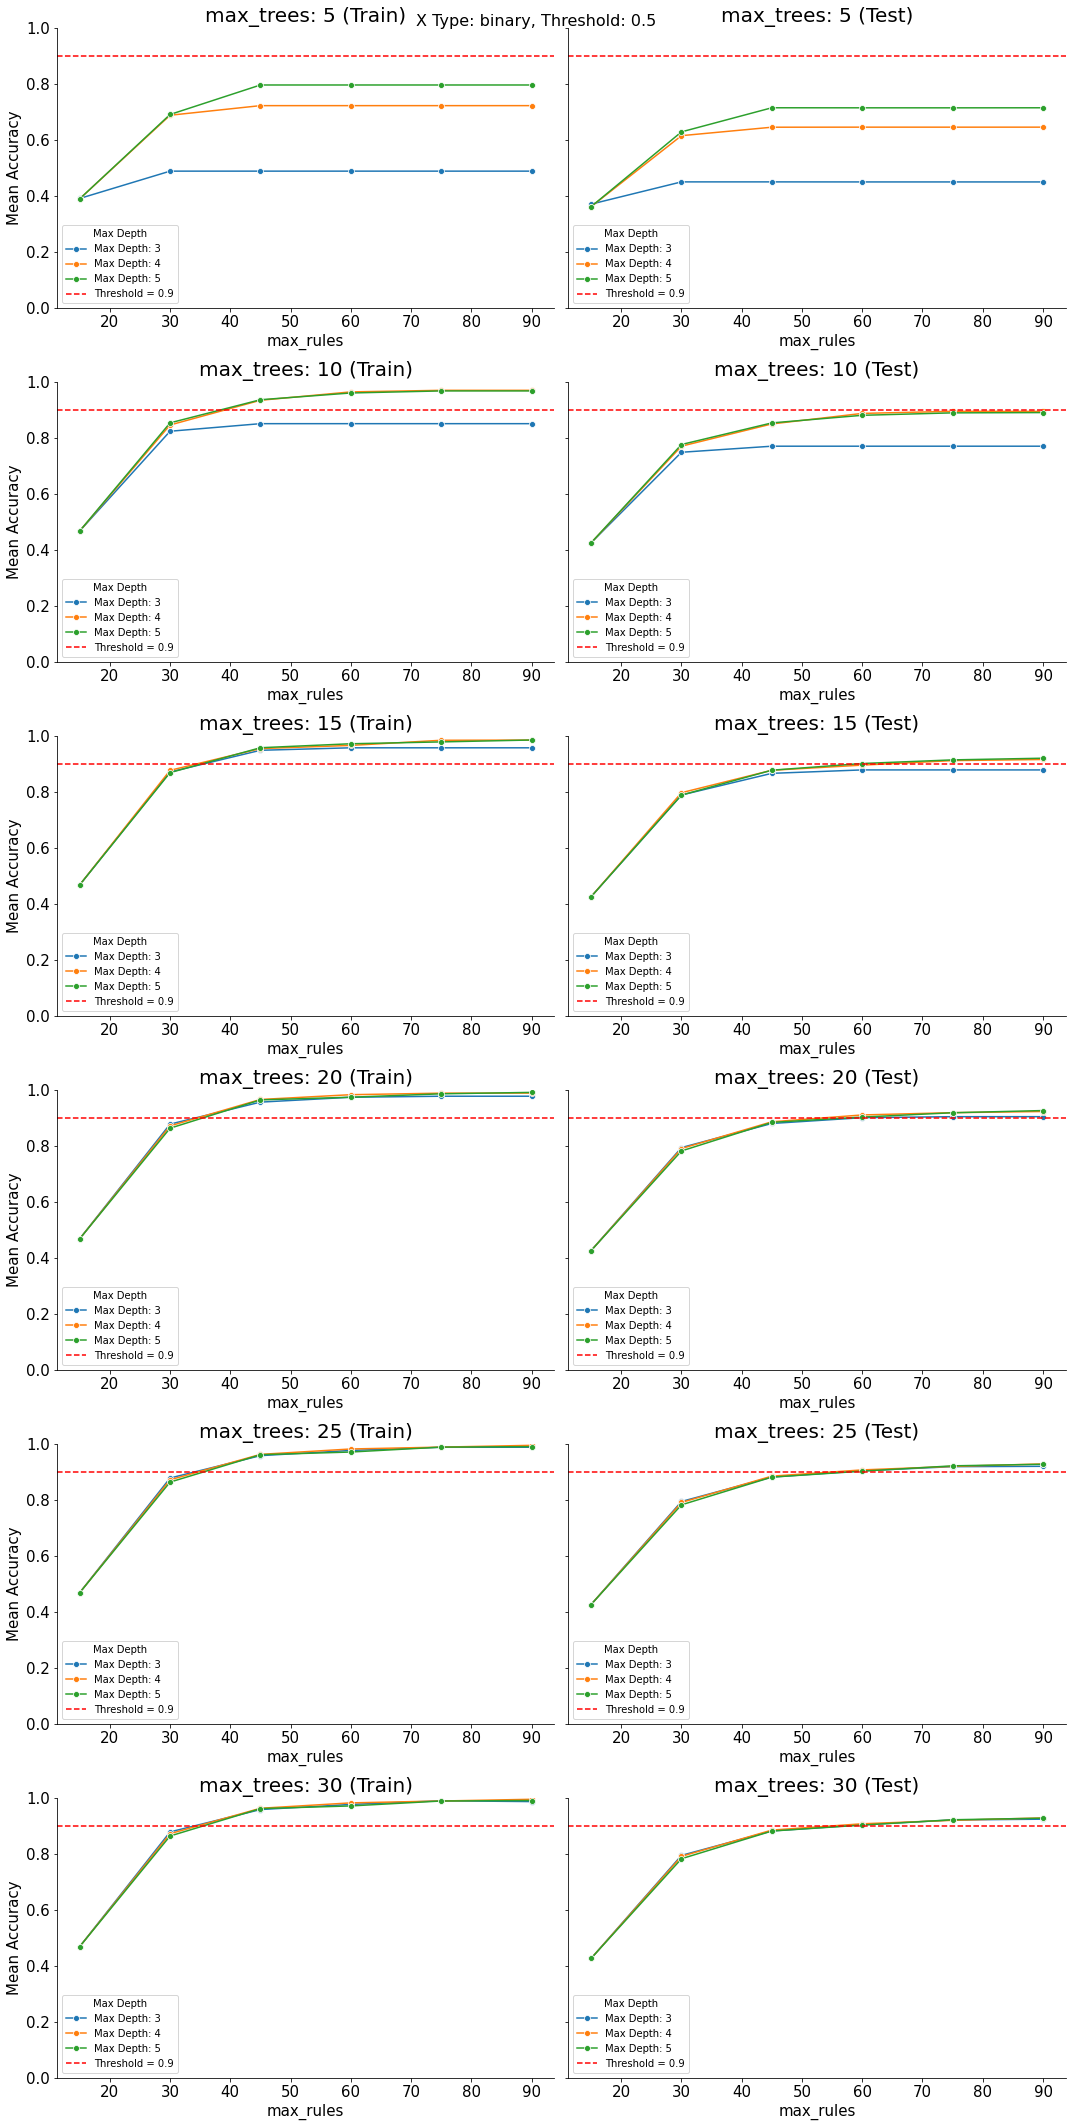

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame 'r' is already loaded

# Loop through unique combinations of X_type and thresh
for (x_type, thresh), group in r.groupby(['X_type', 'thresh']):
    if x_type=='binary' and thresh == 0.5:
        # Create a figure for the current combination
        max_trees_unique = sorted(group['max_trees'].unique())
        num_rows = len(max_trees_unique)
        num_cols = 2  # One for train, one for val

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharey=True)
        fig.suptitle(f'X Type: {x_type}, Threshold: {thresh}', fontsize=16)

        # Loop through max_trees to create each row
        for row_idx, max_trees in enumerate(max_trees_unique):
            row_data = group[group['max_trees'] == max_trees]

            # Loop through max_depth values (3, 4, 5)
            for max_depth in [3, 4, 5]:
                depth_data = row_data[row_data['max_depth'] == max_depth]

                # For training accuracy
                ax_train = axes[row_idx, 0]
                sns.lineplot(data=depth_data, x='max_rules', y='cbm_mean_accuracy_train', ax=ax_train, 
                             marker='o', label=f'Max Depth: {max_depth}')
                # ax_train.fill_between(depth_data['max_rules'], 
                #                       depth_data['cbm_mean_accuracy_train'] - depth_data['cbm_std_accuracy_train'], 
                #                       depth_data['cbm_mean_accuracy_train'] + depth_data['cbm_std_accuracy_train'], 
                #                       alpha=0.2)
            ax_train.axhline(y=0.9, color='r', linestyle='--', label='Threshold = 0.9')

            ax_train.set_title(f'max_trees: {max_trees} (Train)')
            ax_train.set_ylabel('Mean Accuracy')
            ax_train.set_ylim(0, 1)  # Adjust based on your accuracy range
            ax_train.legend(title='Max Depth')

            # For validation accuracy
            ax_val = axes[row_idx, 1]
            for max_depth in [3, 4, 5]:
                depth_data = row_data[row_data['max_depth'] == max_depth]

                sns.lineplot(data=depth_data, x='max_rules', y='cbm_mean_accuracy_val', ax=ax_val, 
                             marker='o', label=f'Max Depth: {max_depth}')
                # ax_val.fill_between(depth_data['max_rules'], 
                #                     depth_data['cbm_mean_accuracy_val'] - depth_data['cbm_std_accuracy_val'], 
                #                     depth_data['cbm_mean_accuracy_val'] + depth_data['cbm_std_accuracy_val'], 
                #                     alpha=0.2)
            ax_val.axhline(y=0.9, color='r', linestyle='--', label='Threshold = 0.9')

            ax_val.set_title(f'max_trees: {max_trees} (Test)')
            ax_val.set_ylim(0, 1)  # Adjust based on your accuracy range
            ax_val.legend(title='Max Depth')

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
        plt.savefig('figs_exps.png')
        print('----------')
